In [ ]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('../data/clean_df_tel1.csv', na_values=['?', None])
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [11]:
df_clean = df.copy()
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [12]:
df_clean=df_clean.drop(['Bearer Id', 'Start', 'End'], axis=1)
df_clean.head()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,45.0,5.0,6.0,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,486.0,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,45.0,5.0,44.0,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,565.0,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,45.0,5.0,6.0,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [13]:
df_clean.isnull().sum()

Start ms                          0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
Social Media DL (Bytes)           0
Social Media UL (Bytes)     

In [ ]:
df_clean.dropna(subset = ['diag_1',"diag_2",'diag_3'], inplace=True)
df_clean.isnull().sum()

race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
df_clean['metformin'] = lb.fit_transform(df_clean['metformin'])
df_clean['repaglinide'] = lb.fit_transform(df_clean['repaglinide'])
df_clean['nateglinide'] = lb.fit_transform(df_clean['nateglinide'])
df_clean['chlorpropamide'] = lb.fit_transform(df_clean['chlorpropamide'])
df_clean['glimepiride'] = lb.fit_transform(df_clean['glimepiride'])
df_clean['acetohexamide'] = lb.fit_transform(df_clean['acetohexamide'])
df_clean['glipizide'] = lb.fit_transform(df_clean['glipizide'])
df_clean['glyburide'] = lb.fit_transform(df_clean['glyburide'])
df_clean['tolbutamide'] = lb.fit_transform(df_clean['tolbutamide'])
df_clean['pioglitazone'] = lb.fit_transform(df_clean['pioglitazone'])
df_clean['rosiglitazone'] = lb.fit_transform(df_clean['rosiglitazone'])

df_clean['acarbose'] = lb.fit_transform(df_clean['acarbose'])
df_clean['miglitol'] = lb.fit_transform(df_clean['miglitol'])
df_clean['troglitazone'] = lb.fit_transform(df_clean['troglitazone'])
df_clean['tolazamide'] = lb.fit_transform(df_clean['tolazamide'])
df_clean['examide'] = lb.fit_transform(df_clean['examide'])
df_clean['citoglipton'] = lb.fit_transform(df_clean['citoglipton'])
df_clean['insulin'] = lb.fit_transform(df_clean['insulin'])
df_clean['glyburide-metformin'] = lb.fit_transform(df_clean['glyburide-metformin'])
df_clean['glipizide-metformin'] = lb.fit_transform(df_clean['glipizide-metformin'])


df_clean['glimepiride-pioglitazone'] = lb.fit_transform(df_clean['glimepiride-pioglitazone'])
df_clean['metformin-rosiglitazone'] = lb.fit_transform(df_clean['metformin-rosiglitazone'])
df_clean['metformin-pioglitazone'] = lb.fit_transform(df_clean['metformin-pioglitazone'])
df_clean['change'] = lb.fit_transform(df_clean['change'])
df_clean['diabetesMed'] = lb.fit_transform(df_clean['diabetesMed'])
df_clean['readmitted'] = lb.fit_transform(df_clean['readmitted'])
df_clean['race'] = lb.fit_transform(df_clean['race'])
df_clean['gender'] = lb.fit_transform(df_clean['gender'])
df_clean.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,1,1,7,3,59,0,18,0,0,0,276.0,250.01,255.0,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
3,2,1,1,1,7,2,44,1,16,0,0,0,8.0,250.43,403.0,7,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,2
4,2,1,1,1,7,1,51,0,8,0,0,0,197.0,157.00,250.0,5,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,2
5,2,1,2,1,2,3,31,6,16,0,0,0,414.0,411.00,250.0,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,1
7,2,1,1,1,7,5,73,0,12,0,0,0,428.0,492.00,250.0,8,1,1,1,1,1,0,1,2,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1


In [ ]:
df_clean.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,1,1,7,3,59,0,18,0,0,0,276.0,250.01,255.0,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
3,2,1,1,1,7,2,44,1,16,0,0,0,8.0,250.43,403.0,7,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,2
4,2,1,1,1,7,1,51,0,8,0,0,0,197.0,157.00,250.0,5,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,2
5,2,1,2,1,2,3,31,6,16,0,0,0,414.0,411.00,250.0,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1,1
7,2,1,1,1,7,5,73,0,12,0,0,0,428.0,492.00,250.0,8,1,1,1,1,1,0,1,2,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1


In [ ]:
y= df_clean['readmitted']
len(y)

93225

In [ ]:
x = df_clean.drop(['readmitted'],axis=1)

In [ ]:
len(x)

93225

[3.155e-01 1.729e+01 1.533e+01 2.604e+03 4.313e+02 6.592e+02 1.311e+03
 4.120e+02 1.007e+03 2.917e+03 4.495e+03 1.261e+04 2.731e+03 1.971e+02
 4.372e+03 6.086e+02 1.299e+01 6.560e-01 8.625e-03 4.112e-03 4.664e-01
 1.858e+00 2.670e+00 5.309e-02 1.644e+00 1.589e+00 1.646e+00 8.551e-02
 1.072e-03 1.429e+00 1.061e+00       nan       nan 2.342e-01 7.301e-03
 9.282e-01 1.858e+00 1.711e+00 8.553e-01 9.501e+01 8.457e+01]
Feature 0: 0.315502
Feature 1: 17.287898
Feature 2: 15.332621
Feature 3: 2604.256923
Feature 4: 431.318206
Feature 5: 659.230439
Feature 6: 1310.768572
Feature 7: 411.979262
Feature 8: 1007.322951
Feature 9: 2917.156922
Feature 10: 4494.822055
Feature 11: 12606.231712
Feature 12: 2731.357116
Feature 13: 197.119252
Feature 14: 4372.027070
Feature 15: 608.635958
Feature 16: 12.986065
Feature 17: 0.656015
Feature 18: 0.008625
Feature 19: 0.004112
Feature 20: 0.466355
Feature 21: 1.857909
Feature 22: 2.669720
Feature 23: 0.053091
Feature 24: 1.644012
Feature 25: 1.588770
Feature 2

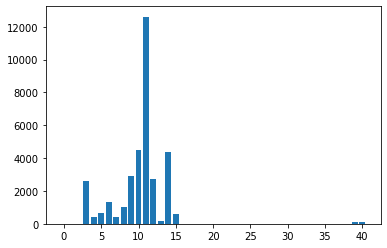

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt



# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

for i in range(len(fit.scores_)):
	print('Feature %d: %f' % (i, fit.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)
plt.show()
#features = fit.transform(x)
# Summarize selected features
#print(features[0:5,:])

In [ ]:
selected_features=x[['discharge_disposition_id', 'time_in_hospital', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'change', 'diabetesMed']]
len(selected_features)

93225

In [ ]:
selected_features.head()

,discharge_disposition_id,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed
1,1,3,18,0,0,0,9,0,1
3,1,2,16,0,0,0,7,0,1
4,1,1,8,0,0,0,5,0,1
5,1,3,16,0,0,0,9,1,1
7,1,5,12,0,0,0,8,1,1


In [ ]:
len(y)

93225

In [ ]:
y.to_csv('test.csv')

In [ ]:
selected_features.to_csv('trian.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from joblib import dump,load
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(selected_features,y,test_size=0.2,random_state=40)



# creating scaler scale var.
norm = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(xtrain)
pickle.dump(norm_fit, open("scaler.pkl", 'wb'))
dump(norm_fit,'scaler.joblib')
# transfromation of trainig data
scal_xtrain = norm_fit.transform(xtrain)

# transformation of testing data
scal_xtest = norm_fit.transform(xtest)
print(scal_xtrain)






[[0.    0.231 0.295 ... 0.267 0.    1.   ]
 [0.    0.154 0.051 ... 0.533 0.    1.   ]
 [0.111 0.615 0.103 ... 0.533 1.    0.   ]
 ...
 [0.074 0.154 0.141 ... 0.533 0.    1.   ]
 [0.    0.154 0.167 ... 0.2   0.    1.   ]
 [0.63  0.308 0.09  ... 0.533 1.    0.   ]]


In [ ]:
import pickle


In [ ]:
  
# create model variable
rnd = RandomForestClassifier()
  
# fit the model
fit_rnd = rnd.fit(xtrain,ytrain)
  
# checking the accuracy score
rnd_score = rnd.score(xtest,ytest) 
  
print('score of model is : ',rnd_score)
  
pickle.dump(rnd, open("model.pkl", 'wb'))
#dump(rnd, 'model.joblib')


score of model is :  0.5256637168141592


In [ ]:
from sklearn.metrics import classification_report
x_predict = list(rnd.predict(xtest))
print(classification_report(ytest, x_predict))
#df = {'predicted':x_predict,'orignal':ytest}
#df

              precision    recall  f1-score   support

           0       0.16      0.08      0.11      2024
           1       0.44      0.37      0.40      6689
           2       0.59      0.72      0.65      9932

    accuracy                           0.52     18645
   macro avg       0.40      0.39      0.39     18645
weighted avg       0.49      0.52      0.50     18645

